## Proje-2 Duygu Analizi

### Kütüphanelerin yüklenmesi

In [2]:
# Kütüphaneler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats

# Machine Learning
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

In [3]:
# Veri setini aktaralım
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(path = "ibdb.npz",
    num_words = None, skip_top = 0, maxlen = None, seed = 113, 
    start_char = 1, oov_char = 2, index_from = 3)

### Verinin Tipi

In [4]:
# Verinin tipi
print("X Eğitim Tipi : ", type(X_egitim))
print("Y Eğitim Tipi : ", type(Y_egitim))

X Eğitim Tipi :  <class 'numpy.ndarray'>
Y Eğitim Tipi :  <class 'numpy.ndarray'>


### Verinin Şekli

In [5]:
# verinin şekli
print("X Eğitim Şekli : ", X_egitim.shape)
print("Y Eğitim Şekli : ", Y_egitim.shape)

X Eğitim Şekli :  (25000,)
Y Eğitim Şekli :  (25000,)


### Etiket Değerleri

In [6]:
# Kaç etiket var?
print("Y Eğitim Değerleri : ", np.unique(Y_egitim))
print("Y Test Değrleri : ", np.unique(Y_test))

Y Eğitim Değerleri :  [0 1]
Y Test Değrleri :  [0 1]


### Eğitim veri seti dağılımı

In [9]:
# Eğitim veri setinin dağılımı
unique, counts = np.unique(Y_egitim, return_counts = True)
print("Y eğitim dağılımı : ", dict(zip(unique, counts)))

Y eğitim dağılımı :  {0: 12500, 1: 12500}


### Test veri seti dağılımı

In [7]:
# test veri setinin dağılımı
unique, counts = np.unique(Y_test, return_counts = True)
print("Y test dağılımı : ", dict(zip(unique, counts)))

Y test dağılımı :  {0: 12500, 1: 12500}


### Dağılımı görselleştirelim

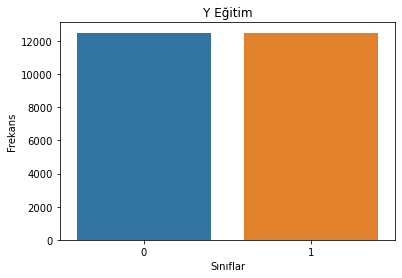

In [8]:
# Görsel - Y Eğitim
plt.figure
sns.countplot(Y_egitim)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Eğitim")
plt.show()

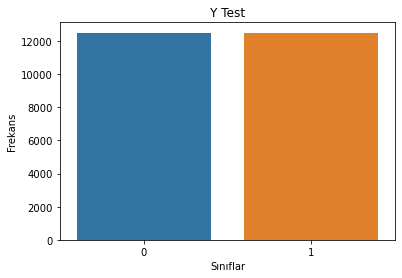

In [9]:
# Görsel - Y Test
plt.figure
sns.countplot(Y_test)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Test")
plt.show()

### Örnek bir yorum

In [10]:
# Örnek bir yorum
yorum = X_egitim[0]
print("Yorum : ", yorum)
print("Yorum Kelime Sayısı : ", len(yorum))

Yorum :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Yorum Kelime Sayısı :  218


### Kelime Sayısı

In [11]:
# Kelime Sayısı
word_index = imdb.get_word_index()
print("Kelime Sayısı : ", len(word_index))

Kelime Sayısı :  88584


### Kelimelerin anlamlandırılması

In [12]:
# Veri içindeki keimelerin anlamlandırılması
for keys, values in word_index.items():
    if values == 1: # 1 - 14 - 22 olabilir.
        print(keys) 

the


### Yapılan yorumlar için bir fonksiyon

In [13]:
# Yapılan yorumlar için fonksiyon
def neSoyledi(index = 24):
    # index, eğitim setinden buluna yorumun indeksi
    ters_indeks = dict([(value, key) for (key, value) in word_index.items()])
    yorumu_coz = " ".join([ters_indeks.get(i - 3, "!") for i in X_egitim[index]])
    print("Yorum : ", index)
    print(yorumu_coz)
    print()
    if Y_egitim[index] == 0:
        print("Olumsuz")
    else:
        print("Olumlu")
    print()

# 36. yorum
neSoyledi(36)

Yorum :  36
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up

Olumsuz



### En çok kullanılan 15.000 kelime ile işlem yapalım

In [14]:
# en çok kullanılan 15000 kelime ile işlem yapalım.
num_words = 15000
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(num_words = num_words)

### Yorumları 130 kelime ile sınırlayıp, sabitleyelim.

In [15]:
# Yorumları max. 130 kelime ile sınırla
# tekrarlanan sinir ağlarında girdi boyu sabit olmalı
maxlen = 130
X_egitim = pad_sequences(X_egitim, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)
print(X_egitim[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


### RNN Oluşturalım

In [16]:
# RNN temelini oluşturalım
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_egitim[0])))
# pozitif tam sayıları sabit boyutlu vektöre dönüştür.
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), 
    return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


### Modeli derleyelim

In [17]:
# Modeli derleyelim.
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop",
    metrics = ["accuracy"])

### RNN Eğitimi

In [18]:
# RNN Eğitimi
tarih = rnn.fit(X_egitim, Y_egitim, validation_data = (X_test, Y_test), 
    epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
196/196 [==============================] - 10s 47ms/step - loss: 0.6217 - accuracy: 0.6589 - val_loss: 0.6851 - val_accuracy: 0.6303
Epoch 2/5
196/196 [==============================] - 9s 44ms/step - loss: 0.4065 - accuracy: 0.8242 - val_loss: 0.3506 - val_accuracy: 0.8460
Epoch 3/5
196/196 [==============================] - 9s 44ms/step - loss: 0.2990 - accuracy: 0.8765 - val_loss: 0.3593 - val_accuracy: 0.8471
Epoch 4/5
196/196 [==============================] - 9s 45ms/step - loss: 0.2448 - accuracy: 0.9034 - val_loss: 0.5266 - val_accuracy: 0.8047
Epoch 5/5
196/196 [==============================] - 9s 46ms/step - loss: 0.2109 - accuracy: 0.9182 - val_loss: 0.3897 - val_accuracy: 0.8445


### Doğruluk

In [19]:
# Doğruluk
dogruluk = rnn.evaluate(X_test, Y_test)
print("Test doğruluk : %", dogruluk[1] * 100)

782/782 [==============================] - 5s 6ms/step - loss: 0.3897 - accuracy: 0.8445
Test doğruluk : % 84.44799780845642


### Doğruluğu görselleştirelim

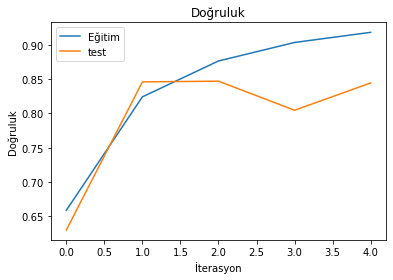

In [20]:
# Doğruluğu görselleştirelim.
plt.figure()
plt.plot(tarih.history["accuracy"], label = "Eğitim")
plt.plot(tarih.history["val_accuracy"], label = "test")
plt.title("Doğruluk")
plt.ylabel("Doğruluk")
plt.xlabel("İterasyon")
plt.legend()
plt.show()

### Maliyeti görselleştirelim

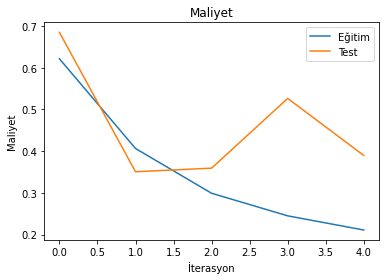

In [21]:
# Maliyeti görselleştirelim.
plt.figure()
plt.plot(tarih.history["loss"], label = "Eğitim")
plt.plot(tarih.history["val_loss"], label = "Test")
plt.title("Maliyet")
plt.ylabel("Maliyet")
plt.xlabel("İterasyon")
plt.legend()
plt.show()